In [ ]:
pip install kneed

In [ ]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from kneed import KneeLocator
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
sns.set()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
df = pd.read_csv('data.csv')
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [ ]:
df2 = df.loc[df['year'] < 1930]
df3 = df2.loc[df2['popularity'] == max(df2['popularity']), ('artists', 'popularity')]
df3

,artists,popularity
1406,['Louis Armstrong'],52


In [ ]:
df2 = df.loc[(1929 < df['year']) & (df['year'] < 1940)]
df3 = df2.loc[df2['popularity'] == max(df2['popularity']), ('artists', 'popularity')]
df3

,artists,popularity
2206,"['Billie Holiday', 'Eddie Heywood']",64


In [ ]:
df2 = df.loc[(1939 < df['year']) & (df['year'] < 1950)]
df3 = df2.loc[df2['popularity'] == max(df2['popularity']), ('artists', 'popularity')]
df3

,artists,popularity
4006,"['Bing Crosby', 'Ken Darby Singers', 'John Sco...",76


In [ ]:
df2 = df.loc[(1949 < df['year']) & (df['year'] < 1960)]
df3 = df2.loc[df2['popularity'] == max(df2['popularity']), ('artists', 'popularity')]
df3

,artists,popularity
7406,['Dean Martin'],81


In [ ]:
df2 = df.loc[(1959 < df['year']) & (df['year'] < 1970)]
df3 = df2.loc[df2['popularity'] == max(df2['popularity']), ('artists', 'popularity')]
df3

,artists,popularity
8406,['Brenda Lee'],85


In [ ]:
df2 = df.loc[(1969 < df['year']) & (df['year'] < 1980)]
df3 = df2.loc[df2['popularity'] == max(df2['popularity']), ('artists', 'popularity')]
df3

,artists,popularity
11006,['Fleetwood Mac'],89


In [ ]:
df2 = df.loc[(1979 < df['year']) & (df['year'] < 1990)]
df3 = df2.loc[df2['popularity'] == max(df2['popularity']), ('artists', 'popularity')]
df3

,artists,popularity
11606,['AC/DC'],84
12208,['The Police'],84
12607,['a-ha'],84


In [ ]:
df2 = df.loc[(1989 < df['year']) & (df['year'] < 2000)]
df3 = df2.loc[df2['popularity'] == max(df2['popularity']), ('artists', 'popularity')]
df3

,artists,popularity
14406,['Mariah Carey'],88


In [ ]:
df2 = df.loc[(1999 < df['year']) & (df['year'] < 2010)]
df3 = df2.loc[df2['popularity'] == max(df2['popularity']), ('artists', 'popularity')].drop_duplicates()
df3

,artists,popularity
15606,['Coldplay'],84
15608,['Linkin Park'],84
16006,"['Eminem', 'Nate Dogg']",84


In [ ]:
df2 = df.loc[(2009 < df['year']) & (df['year'] < 2020)]
df3 = df2.loc[df2['popularity'] == max(df2['popularity']), ('artists', 'popularity')]
df3

,artists,popularity
19407,['Harry Styles'],94


In [ ]:
df = pd.read_csv('data.csv')
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [ ]:
y = df['popularity']
X = df.drop(columns=['year', 'artists', 'explicit', 'id', 'mode', 'name', 'release_date', 'key', 'duration_ms', 'popularity'])
X

,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo
0,0.0594,0.98200,0.279,0.211,0.878000,0.6650,-20.096,0.0366,80.954
1,0.9630,0.73200,0.819,0.341,0.000000,0.1600,-12.441,0.4150,60.936
2,0.0394,0.96100,0.328,0.166,0.913000,0.1010,-14.850,0.0339,110.339
3,0.1650,0.96700,0.275,0.309,0.000028,0.3810,-9.316,0.0354,100.109
4,0.2530,0.95700,0.418,0.193,0.000002,0.2290,-10.096,0.0380,101.665
...,...,...,...,...,...,...,...,...,...
170648,0.6080,0.08460,0.786,0.808,0.000289,0.0822,-3.702,0.0881,105.029
170649,0.7340,0.20600,0.717,0.753,0.000000,0.1010,-6.020,0.0605,137.936
170650,0.6370,0.10100,0.634,0.858,0.000009,0.2580,-2.226,0.0809,91.688
170651,0.1950,0.00998,0.671,0.623,0.000008,0.6430,-7.161,0.3080,75.055


In [ ]:
scaler = MinMaxScaler()
X_std = scaler.fit_transform(X)
y_std = scaler.fit_transform(y.values.reshape(-1, 1))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

In [ ]:
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=f_regression, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size=0.33, random_state=42)

Feature 0: 21.978328
Feature 1: 55620.653743
Feature 2: 4719.131486
Feature 3: 34940.439728
Feature 4: 11124.801834
Feature 5: 648.007271
Feature 6: 30101.197587
Feature 7: 3395.181199
Feature 8: 2056.267178


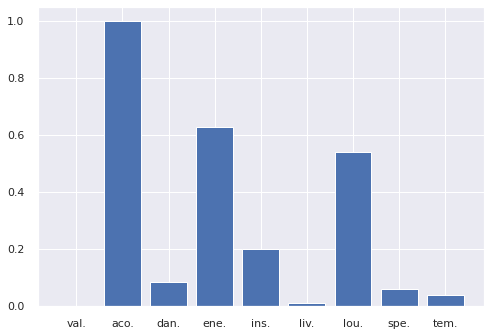

In [ ]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train.ravel(), X_test)
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
p = scaler.fit_transform(fs.scores_.reshape(-1, 1))
pyplot.bar(['val.', 'aco.', 'dan.', 'ene.', 'ins.', 'liv.', 'lou.', 'spe.', 'tem.'], p.reshape(9,))
pyplot.show()

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_std);
scores_pca = pca.transform(X_std)

In [ ]:
wcss = []
max_clusters = 21
for i in range(1, max_clusters):
    kmeans_pca = KMeans(i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)
n_clusters = KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', direction='decreasing').knee
print("Optimal number of clusters", n_clusters)

Optimal number of clusters 4


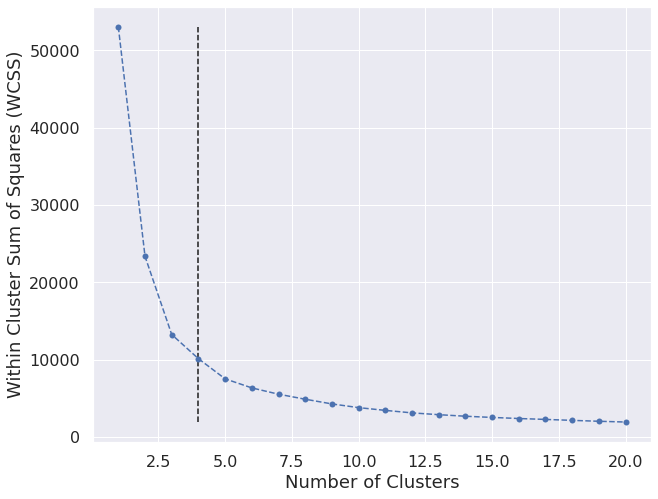

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.plot(range(1, 21), wcss, marker='o', linestyle='--')
plt.vlines(KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', direction='decreasing').knee, ymin=min(wcss), ymax=max(wcss), linestyles='dashed')
plt.xlabel('Number of Clusters', fontsize=18)
plt.ylabel('Within Cluster Sum of Squares (WCSS)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [ ]:
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca);

In [ ]:
df_seg_pca_kmeans = pd.concat([pd.DataFrame(X_std), pd.DataFrame(scores_pca)], axis=1)
# df_seg_pca_kmeans.columns.values[(-1*2):] = ["Component " + str(i+1) for i in range(2)]
df_seg_pca_kmeans.columns = ['valence', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'Component 1', 'Component 2']
df_seg_pca_kmeans['Cluster'] = kmeans_pca.labels_
df_seg_pca_kmeans.head()

,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,Component 1,Component 2,Cluster
0,0.0594,0.985944,0.282389,0.211,0.878000,0.665,0.624916,0.037732,0.332450,0.914791,0.521781,0
1,0.9630,0.734940,0.828947,0.341,0.000000,0.160,0.744797,0.427835,0.250243,0.038439,-0.532255,1
2,0.0394,0.964859,0.331984,0.166,0.913000,0.101,0.707071,0.034948,0.453125,0.925289,0.541565,0
3,0.1650,0.970884,0.278340,0.309,0.000028,0.381,0.793736,0.036495,0.411113,0.484185,-0.143180,2
4,0.2530,0.960843,0.423077,0.193,0.000002,0.229,0.781521,0.039175,0.417503,0.493923,-0.234173,2


In [ ]:
from seaborn import color_palette

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



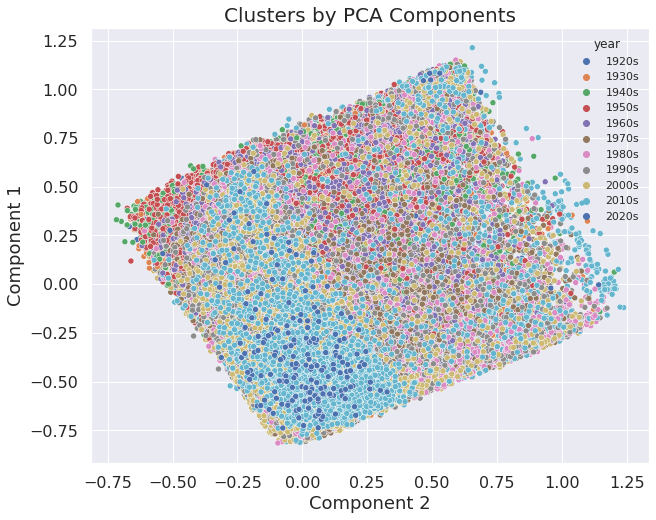

In [ ]:
x = df_seg_pca_kmeans['Component 2']
y = df_seg_pca_kmeans['Component 1']
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x, y, hue=df4, palette = color_palette(n_colors=11))
plt.title('Clusters by PCA Components', fontsize=20)
plt.xlabel("Component 2", fontsize=18)
plt.ylabel("Component 1", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [ ]:
df_seg_pca_kmeans.groupby('Cluster').mean()

,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,Component 1,Component 2
Cluster,,,,,,,,,,,
0,0.352199,0.891423,0.401128,0.230467,0.813454,0.182372,0.657700,0.057572,0.434916,0.725275,0.371140
1,0.633379,0.472830,0.611914,0.504980,0.021001,0.206679,0.773925,0.133618,0.486537,-0.126280,-0.151621
2,0.470059,0.878609,0.509080,0.258469,0.053613,0.207210,0.720335,0.113340,0.455991,0.362983,-0.259969
3,0.576573,0.080463,0.584271,0.741501,0.084894,0.213845,0.823082,0.089159,0.512222,-0.490817,0.146087


In [ ]:
df = pd.read_csv('data.csv')
df.shape

(170653, 19)

In [ ]:
df2 = df['year'].astype(str)
df3 = df2.str[:-1]
df4 = df3 + '0s'
df4

0         1920s
1         1920s
2         1920s
3         1920s
4         1920s
          ...  
170648    2020s
170649    2020s
170650    2020s
170651    2020s
170652    2020s
Name: year, Length: 170653, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
y = LabelEncoder().fit_transform(df4)
X = df.drop(columns=['year', 'artists', 'explicit', 'id', 'mode', 'name', 'popularity', 'release_date', 'key', 'duration_ms'])
X.shape

(170653, 9)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print('Accuracy: {}'.format(accuracy))

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print('Accuracy: {}'.format(accuracy))

Accuracy: 0.22585748886631768


In [ ]:
model = MLPClassifier()
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print('Accuracy: {}'.format(accuracy))